In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('epilepsy_federated_dataset.csv')
df = data.copy()
df.head()

,Mean_EEG_Amplitude,EEG_Std_Dev,EEG_Skewness,EEG_Kurtosis,Zero_Crossing_Rate,Root_Mean_Square,Peak_to_Peak_Amplitude,Signal_Energy,Variance_of_EEG_Signals,Interquartile_Range,...,Post_Seizure_Recovery,Seizure_Frequency_Per_Hour,Interictal_Spike_Rate,Seizure_Intensity_Index,Age,Gender,Medication_Status,Seizure_History,Multi_Class_Label,Seizure_Type_Label
0,0.463995,1.560095,-1.953752,1.417816,53.428102,2.552078,3.734923,17.276018,4.627323,2.054438,...,0.382942,3.250527,6.405068,0.686015,87,0,1,18,0,2
1,0.324632,0.953233,-0.034527,1.333842,61.486037,1.968715,1.285857,8.099144,3.572132,0.541116,...,0.423757,9.210367,3.192447,0.944232,1,1,0,0,2,0
2,0.499497,0.419182,-0.697510,7.345670,33.569696,2.226112,1.869052,7.211445,4.022814,0.939826,...,0.407296,3.212498,4.143878,0.288099,53,1,1,7,0,1
3,0.721730,0.962900,-1.161993,0.774990,81.811036,2.349506,3.524583,13.940857,2.152732,1.032526,...,0.184500,1.310543,7.854328,1.463863,18,0,0,18,0,2
4,0.305064,1.253647,-1.166630,1.265767,38.618300,1.994878,2.902625,7.698449,4.332478,0.660386,...,0.368572,6.087262,1.659506,0.121632,12,1,1,3,1,1


In [3]:
print(f' Number of rows : {df.shape[0]}\n Number of columns : {df.shape[1]}')

 Number of rows : 289010
 Number of columns : 52


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 289010 entries, 0 to 289009
Data columns (total 52 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   Mean_EEG_Amplitude                  289010 non-null  float64
 1   EEG_Std_Dev                         289010 non-null  float64
 2   EEG_Skewness                        289010 non-null  float64
 3   EEG_Kurtosis                        289010 non-null  float64
 4   Zero_Crossing_Rate                  289010 non-null  float64
 5   Root_Mean_Square                    289010 non-null  float64
 6   Peak_to_Peak_Amplitude              289010 non-null  float64
 7   Signal_Energy                       289010 non-null  float64
 8   Variance_of_EEG_Signals             289010 non-null  float64
 9   Interquartile_Range                 289010 non-null  float64
 10  Auto_Correlation_of_EEG_Signals     289010 non-null  float64
 11  Cross_Correlation_Between_

In [5]:
df.isnull().sum()

Mean_EEG_Amplitude                    0
EEG_Std_Dev                           0
EEG_Skewness                          0
EEG_Kurtosis                          0
Zero_Crossing_Rate                    0
Root_Mean_Square                      0
Peak_to_Peak_Amplitude                0
Signal_Energy                         0
Variance_of_EEG_Signals               0
Interquartile_Range                   0
Auto_Correlation_of_EEG_Signals       0
Cross_Correlation_Between_Channels    0
Hjorth_Mobility                       0
Hjorth_Complexity                     0
Line_Length_Feature                   0
Delta_Band_Power                      0
Theta_Band_Power                      0
Alpha_Band_Power                      0
Beta_Band_Power                       0
Gamma_Band_Power                      0
Low_to_High_Frequency_Power_Ratio     0
Power_Spectral_Density                0
Spectral_Edge_Frequency               0
Spectral_Entropy                      0
Fourier_Transform_Features            0


In [6]:
df[df.duplicated()]

,Mean_EEG_Amplitude,EEG_Std_Dev,EEG_Skewness,EEG_Kurtosis,Zero_Crossing_Rate,Root_Mean_Square,Peak_to_Peak_Amplitude,Signal_Energy,Variance_of_EEG_Signals,Interquartile_Range,...,Post_Seizure_Recovery,Seizure_Frequency_Per_Hour,Interictal_Spike_Rate,Seizure_Intensity_Index,Age,Gender,Medication_Status,Seizure_History,Multi_Class_Label,Seizure_Type_Label


In [7]:
col = df.columns.to_list()
for i in col:
    print(i)
    print(df[i].unique())
    print('********')

Mean_EEG_Amplitude
[0.46399465 0.32463245 0.4994967  ... 0.26625209 0.51259855 0.13998919]
********
EEG_Std_Dev
[1.56009486 0.95323272 0.41918182 ... 1.25751853 0.98376649 0.55817305]
********
EEG_Skewness
[-1.95375185 -0.0345274  -0.69750989 ... -1.21069051 -0.01322426
 -0.05116391]
********
EEG_Kurtosis
[1.41781628 1.33384247 7.34567009 ... 8.61873084 6.46828373 0.95701621]
********
Zero_Crossing_Rate
[53.42810202 61.48603736 33.56969648 ... 82.78891042  8.17688526
 66.4107151 ]
********
Root_Mean_Square
[2.55207767 1.96871521 2.22611219 ... 2.05163962 0.93587041 2.26940117]
********
Peak_to_Peak_Amplitude
[3.73492282 1.28585677 1.86905238 ... 0.81904334 4.60521723 5.19501075]
********
Signal_Energy
[17.27601787  8.09914435  7.21144489 ... 13.81404324 18.54030468
 15.33039211]
********
Variance_of_EEG_Signals
[4.62732336 3.57213198 4.02281352 ... 9.07439234 4.70277332 2.87329262]
********
Interquartile_Range
[2.05443758 0.5411163  0.93982593 ... 0.59036397 0.50615003 1.75090371]
****

In [9]:
num = df.select_dtypes(include=np.number).columns.to_list()
num

['Mean_EEG_Amplitude',
 'EEG_Std_Dev',
 'EEG_Skewness',
 'EEG_Kurtosis',
 'Zero_Crossing_Rate',
 'Root_Mean_Square',
 'Peak_to_Peak_Amplitude',
 'Signal_Energy',
 'Variance_of_EEG_Signals',
 'Interquartile_Range',
 'Auto_Correlation_of_EEG_Signals',
 'Cross_Correlation_Between_Channels',
 'Hjorth_Mobility',
 'Hjorth_Complexity',
 'Line_Length_Feature',
 'Delta_Band_Power',
 'Theta_Band_Power',
 'Alpha_Band_Power',
 'Beta_Band_Power',
 'Gamma_Band_Power',
 'Low_to_High_Frequency_Power_Ratio',
 'Power_Spectral_Density',
 'Spectral_Edge_Frequency',
 'Spectral_Entropy',
 'Fourier_Transform_Features',
 'Wavelet_Entropy',
 'Wavelet_Energy',
 'Discrete_Wavelet_Transform',
 'Continuous_Wavelet_Transform',
 'Wavelet_Based_Shannon_Entropy',
 'Sample_Entropy',
 'Approximate_Entropy',
 'Shannon_Entropy',
 'Permutation_Entropy',
 'Lyapunov_Exponent',
 'Hurst_Exponent',
 'Detrended_Fluctuation_Analysis',
 'Higuchi_Fractal_Dimension',
 'Katz_Fractal_Dimension',
 'Lempel_Ziv_Complexity',
 'Seizure_Dur

In [17]:
cat = df.select_dtypes(exclude=np.number).columns.to_list()
cat

[]

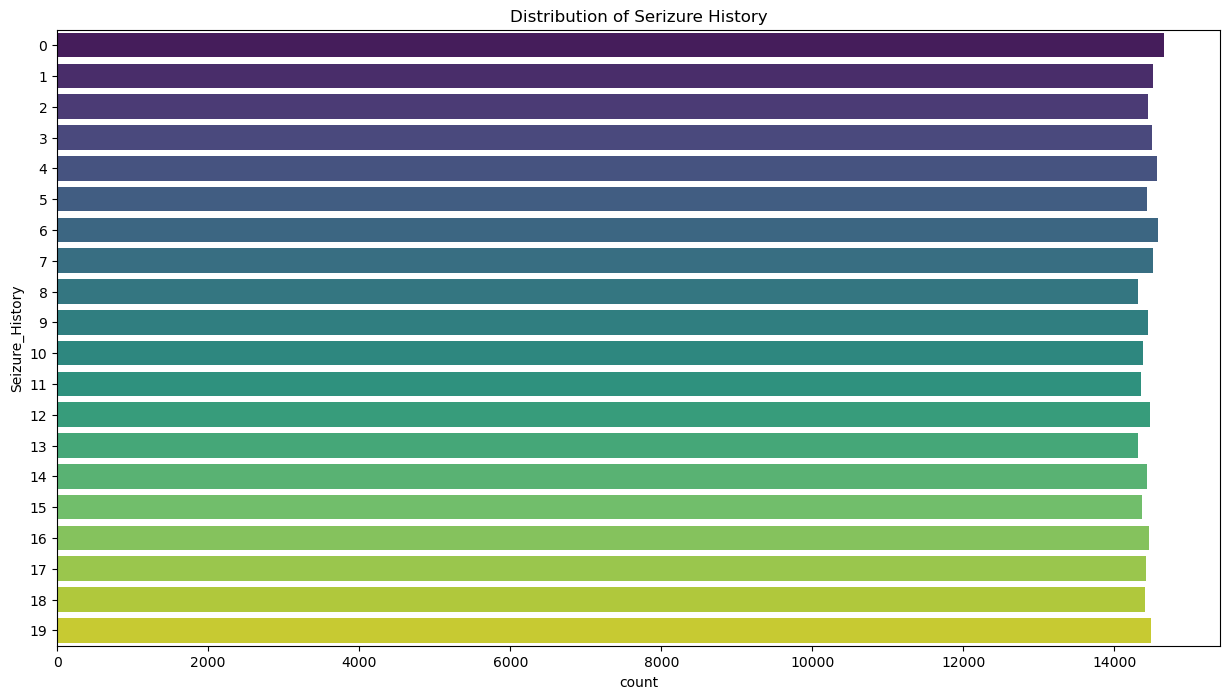

In [19]:
plt.figure(figsize=(15, 8))
sns.countplot(y=df['Seizure_History'], data=df, palette='viridis')
plt.title("Distribution of Serizure History")
plt.show()

In [21]:
df1 = data.copy()
df1.shape

(289010, 52)

In [23]:
def get_age_group(age):
    if age <= 4:
        return 'Infant'
    elif age <= 11:
        return 'Child'
    elif age <=17:
        return 'Teen'
    elif age <=25:
        return 'YoungAdult'
    elif age <= 44:
        return ' Adult'
    elif age<=64:
        return 'Middle_Aged_Adult'
    else:
        return "Seinor"


df1['Age Group'] = df1['Age'].apply(get_age_group)

df1

,Mean_EEG_Amplitude,EEG_Std_Dev,EEG_Skewness,EEG_Kurtosis,Zero_Crossing_Rate,Root_Mean_Square,Peak_to_Peak_Amplitude,Signal_Energy,Variance_of_EEG_Signals,Interquartile_Range,...,Seizure_Frequency_Per_Hour,Interictal_Spike_Rate,Seizure_Intensity_Index,Age,Gender,Medication_Status,Seizure_History,Multi_Class_Label,Seizure_Type_Label,Age Group
0,0.463995,1.560095,-1.953752,1.417816,53.428102,2.552078,3.734923,17.276018,4.627323,2.054438,...,3.250527,6.405068,0.686015,87,0,1,18,0,2,Seinor
1,0.324632,0.953233,-0.034527,1.333842,61.486037,1.968715,1.285857,8.099144,3.572132,0.541116,...,9.210367,3.192447,0.944232,1,1,0,0,2,0,Infant
2,0.499497,0.419182,-0.697510,7.345670,33.569696,2.226112,1.869052,7.211445,4.022814,0.939826,...,3.212498,4.143878,0.288099,53,1,1,7,0,1,Middle_Aged_Adult
3,0.721730,0.962900,-1.161993,0.774990,81.811036,2.349506,3.524583,13.940857,2.152732,1.032526,...,1.310543,7.854328,1.463863,18,0,0,18,0,2,YoungAdult
4,0.305064,1.253647,-1.166630,1.265767,38.618300,1.994878,2.902625,7.698449,4.332478,0.660386,...,6.087262,1.659506,0.121632,12,1,1,3,1,1,Teen
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
289005,0.736238,1.304797,-0.007116,0.048795,63.302061,1.604341,2.391012,2.496988,2.664543,1.067120,...,7.536210,8.586816,0.109013,80,0,0,10,2,0,Seinor
289006,0.199989,1.554030,-0.136011,7.393583,52.130128,1.708409,2.551553,17.728261,3.885055,0.068847,...,2.800535,3.703395,1.729608,64,0,0,9,3,2,Middle_Aged_Adult
289007,0.266252,1.257519,-1.210691,8.618731,82.788910,2.051640,0.819043,13.814043,9.074392,0.590364,...,7.097035,2.505677,1.147862,49,1,1,14,0,0,Middle_Aged_Adult
289008,0.512599,0.983766,-0.013224,6.468284,8.176885,0.935870,4.605217,18.540305,4.702773,0.506150,...,12.546747,2.828676,1.833845,39,0,0,4,0,0,Adult


In [25]:
df1.drop(['Age'], axis=1 ,inplace= True)

In [27]:
df1['Seizure_Type_Label']= df1['Seizure_Type_Label'].replace({2:1})
df1

,Mean_EEG_Amplitude,EEG_Std_Dev,EEG_Skewness,EEG_Kurtosis,Zero_Crossing_Rate,Root_Mean_Square,Peak_to_Peak_Amplitude,Signal_Energy,Variance_of_EEG_Signals,Interquartile_Range,...,Post_Seizure_Recovery,Seizure_Frequency_Per_Hour,Interictal_Spike_Rate,Seizure_Intensity_Index,Gender,Medication_Status,Seizure_History,Multi_Class_Label,Seizure_Type_Label,Age Group
0,0.463995,1.560095,-1.953752,1.417816,53.428102,2.552078,3.734923,17.276018,4.627323,2.054438,...,0.382942,3.250527,6.405068,0.686015,0,1,18,0,1,Seinor
1,0.324632,0.953233,-0.034527,1.333842,61.486037,1.968715,1.285857,8.099144,3.572132,0.541116,...,0.423757,9.210367,3.192447,0.944232,1,0,0,2,0,Infant
2,0.499497,0.419182,-0.697510,7.345670,33.569696,2.226112,1.869052,7.211445,4.022814,0.939826,...,0.407296,3.212498,4.143878,0.288099,1,1,7,0,1,Middle_Aged_Adult
3,0.721730,0.962900,-1.161993,0.774990,81.811036,2.349506,3.524583,13.940857,2.152732,1.032526,...,0.184500,1.310543,7.854328,1.463863,0,0,18,0,1,YoungAdult
4,0.305064,1.253647,-1.166630,1.265767,38.618300,1.994878,2.902625,7.698449,4.332478,0.660386,...,0.368572,6.087262,1.659506,0.121632,1,1,3,1,1,Teen
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
289005,0.736238,1.304797,-0.007116,0.048795,63.302061,1.604341,2.391012,2.496988,2.664543,1.067120,...,0.245607,7.536210,8.586816,0.109013,0,0,10,2,0,Seinor
289006,0.199989,1.554030,-0.136011,7.393583,52.130128,1.708409,2.551553,17.728261,3.885055,0.068847,...,0.363540,2.800535,3.703395,1.729608,0,0,9,3,1,Middle_Aged_Adult
289007,0.266252,1.257519,-1.210691,8.618731,82.788910,2.051640,0.819043,13.814043,9.074392,0.590364,...,0.102549,7.097035,2.505677,1.147862,1,1,14,0,0,Middle_Aged_Adult
289008,0.512599,0.983766,-0.013224,6.468284,8.176885,0.935870,4.605217,18.540305,4.702773,0.506150,...,0.084163,12.546747,2.828676,1.833845,0,0,4,0,0,Adult


In [29]:
df1['Seizure_Type_Label'].unique()

array([1, 0], dtype=int64)

In [31]:
# Count of records in each class for Seizure Type
print(df1['Seizure_Type_Label'].value_counts())
print()
print(df1['Seizure_Type_Label'].value_counts(normalize = True)*100)

Seizure_Type_Label
0    173035
1    115975
Name: count, dtype: int64

Seizure_Type_Label
0    59.871631
1    40.128369
Name: proportion, dtype: float64


In [33]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 289010 entries, 0 to 289009
Data columns (total 52 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   Mean_EEG_Amplitude                  289010 non-null  float64
 1   EEG_Std_Dev                         289010 non-null  float64
 2   EEG_Skewness                        289010 non-null  float64
 3   EEG_Kurtosis                        289010 non-null  float64
 4   Zero_Crossing_Rate                  289010 non-null  float64
 5   Root_Mean_Square                    289010 non-null  float64
 6   Peak_to_Peak_Amplitude              289010 non-null  float64
 7   Signal_Energy                       289010 non-null  float64
 8   Variance_of_EEG_Signals             289010 non-null  float64
 9   Interquartile_Range                 289010 non-null  float64
 10  Auto_Correlation_of_EEG_Signals     289010 non-null  float64
 11  Cross_Correlation_Between_

In [35]:
df1['Age Group'].unique()

array(['Seinor', 'Infant', 'Middle_Aged_Adult', 'YoungAdult', 'Teen',
       ' Adult', 'Child'], dtype=object)

In [37]:
df1['Age_Group']= df1['Age Group'].replace({'Infant':0 , 'Child':1, 'Teen':2 , 'YoungAdult':3 , ' Adult':4 , 'Middle_Aged_Adult':5 , 'Seinor':6})
df1

,Mean_EEG_Amplitude,EEG_Std_Dev,EEG_Skewness,EEG_Kurtosis,Zero_Crossing_Rate,Root_Mean_Square,Peak_to_Peak_Amplitude,Signal_Energy,Variance_of_EEG_Signals,Interquartile_Range,...,Seizure_Frequency_Per_Hour,Interictal_Spike_Rate,Seizure_Intensity_Index,Gender,Medication_Status,Seizure_History,Multi_Class_Label,Seizure_Type_Label,Age Group,Age_Group
0,0.463995,1.560095,-1.953752,1.417816,53.428102,2.552078,3.734923,17.276018,4.627323,2.054438,...,3.250527,6.405068,0.686015,0,1,18,0,1,Seinor,6
1,0.324632,0.953233,-0.034527,1.333842,61.486037,1.968715,1.285857,8.099144,3.572132,0.541116,...,9.210367,3.192447,0.944232,1,0,0,2,0,Infant,0
2,0.499497,0.419182,-0.697510,7.345670,33.569696,2.226112,1.869052,7.211445,4.022814,0.939826,...,3.212498,4.143878,0.288099,1,1,7,0,1,Middle_Aged_Adult,5
3,0.721730,0.962900,-1.161993,0.774990,81.811036,2.349506,3.524583,13.940857,2.152732,1.032526,...,1.310543,7.854328,1.463863,0,0,18,0,1,YoungAdult,3
4,0.305064,1.253647,-1.166630,1.265767,38.618300,1.994878,2.902625,7.698449,4.332478,0.660386,...,6.087262,1.659506,0.121632,1,1,3,1,1,Teen,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
289005,0.736238,1.304797,-0.007116,0.048795,63.302061,1.604341,2.391012,2.496988,2.664543,1.067120,...,7.536210,8.586816,0.109013,0,0,10,2,0,Seinor,6
289006,0.199989,1.554030,-0.136011,7.393583,52.130128,1.708409,2.551553,17.728261,3.885055,0.068847,...,2.800535,3.703395,1.729608,0,0,9,3,1,Middle_Aged_Adult,5
289007,0.266252,1.257519,-1.210691,8.618731,82.788910,2.051640,0.819043,13.814043,9.074392,0.590364,...,7.097035,2.505677,1.147862,1,1,14,0,0,Middle_Aged_Adult,5
289008,0.512599,0.983766,-0.013224,6.468284,8.176885,0.935870,4.605217,18.540305,4.702773,0.506150,...,12.546747,2.828676,1.833845,0,0,4,0,0,Adult,4


In [39]:
df1.drop(['Age Group'], axis=1 ,inplace= True)

In [41]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 289010 entries, 0 to 289009
Data columns (total 52 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   Mean_EEG_Amplitude                  289010 non-null  float64
 1   EEG_Std_Dev                         289010 non-null  float64
 2   EEG_Skewness                        289010 non-null  float64
 3   EEG_Kurtosis                        289010 non-null  float64
 4   Zero_Crossing_Rate                  289010 non-null  float64
 5   Root_Mean_Square                    289010 non-null  float64
 6   Peak_to_Peak_Amplitude              289010 non-null  float64
 7   Signal_Energy                       289010 non-null  float64
 8   Variance_of_EEG_Signals             289010 non-null  float64
 9   Interquartile_Range                 289010 non-null  float64
 10  Auto_Correlation_of_EEG_Signals     289010 non-null  float64
 11  Cross_Correlation_Between_

In [45]:
df2=df1.drop(columns=['Multi_Class_Label','Seizure_Type_Label'], axis=1)
df2.head()

,Mean_EEG_Amplitude,EEG_Std_Dev,EEG_Skewness,EEG_Kurtosis,Zero_Crossing_Rate,Root_Mean_Square,Peak_to_Peak_Amplitude,Signal_Energy,Variance_of_EEG_Signals,Interquartile_Range,...,Seizure_Duration,Pre_Seizure_Pattern,Post_Seizure_Recovery,Seizure_Frequency_Per_Hour,Interictal_Spike_Rate,Seizure_Intensity_Index,Gender,Medication_Status,Seizure_History,Age_Group
0,0.463995,1.560095,-1.953752,1.417816,53.428102,2.552078,3.734923,17.276018,4.627323,2.054438,...,1.424513,0.298005,0.382942,3.250527,6.405068,0.686015,0,1,18,6
1,0.324632,0.953233,-0.034527,1.333842,61.486037,1.968715,1.285857,8.099144,3.572132,0.541116,...,15.641924,0.232762,0.423757,9.210367,3.192447,0.944232,1,0,0,0
2,0.499497,0.419182,-0.697510,7.345670,33.569696,2.226112,1.869052,7.211445,4.022814,0.939826,...,0.562129,0.456977,0.407296,3.212498,4.143878,0.288099,1,1,7,5
3,0.721730,0.962900,-1.161993,0.774990,81.811036,2.349506,3.524583,13.940857,2.152732,1.032526,...,1.422229,0.220526,0.184500,1.310543,7.854328,1.463863,0,0,18,3
4,0.305064,1.253647,-1.166630,1.265767,38.618300,1.994878,2.902625,7.698449,4.332478,0.660386,...,8.675854,0.174483,0.368572,6.087262,1.659506,0.121632,1,1,3,2


#### PCA

In [58]:
cov_matrix=np.cov(df2.T) 
cov_matrix

array([[ 4.37588633e-02, -1.66798554e-04,  5.58929215e-05, ...,
         3.49202201e-04, -7.94342278e-04,  9.10186136e-04],
       [-1.66798554e-04,  6.56654253e-01, -6.03534692e-04, ...,
        -6.04228974e-04, -2.90290515e-03, -3.34019758e-03],
       [ 5.58929215e-05, -6.03534692e-04,  4.37797874e-01, ...,
         1.41456563e-03, -4.18746562e-03, -5.22245166e-04],
       ...,
       [ 3.49202201e-04, -6.04228974e-04,  1.41456563e-03, ...,
         2.39873093e-01,  1.35117193e-03,  1.79799077e-03],
       [-7.94342278e-04, -2.90290515e-03, -4.18746562e-03, ...,
         1.35117193e-03,  3.33292582e+01, -2.60146398e-02],
       [ 9.10186136e-04, -3.34019758e-03, -5.22245166e-04, ...,
         1.79799077e-03, -2.60146398e-02,  3.10645305e+00]])

In [60]:
eigval,eigvect=np.linalg.eig(cov_matrix) 

In [62]:
eigval

array([8.29092338e+02, 8.29856722e+02, 1.00688407e+02, 4.38283478e+01,
       4.40358689e+01, 3.33276570e+01, 2.48011594e+01, 1.97738932e+01,
       1.44888531e+01, 9.45451460e+00, 6.64487976e+00, 5.47900242e+00,
       5.49990772e+00, 4.28233786e+00, 3.10630480e+00, 2.80561333e+00,
       1.59116397e+00, 1.11953722e+00, 1.11468502e+00, 6.56797793e-01,
       6.53416474e-01, 5.37723638e-01, 5.32653653e-01, 4.37796828e-01,
       4.25528071e-01, 4.25136392e-01, 3.02641994e-01, 2.98835779e-01,
       2.47720671e-01, 2.39836010e-01, 2.42270381e-01, 2.11964296e-01,
       1.78936671e-01, 1.58352638e-01, 1.57757684e-01, 1.37386866e-01,
       9.60204626e-02, 5.35740878e-04, 4.27601564e-03, 4.31190500e-03,
       1.97254073e-02, 1.44927361e-02, 1.44179096e-02, 3.42922162e-02,
       4.35795079e-02, 4.38004215e-02, 4.38999177e-02, 5.33584811e-02,
       5.28452293e-02, 5.28295740e-02])

In [64]:
eigvect

array([[-4.34036091e-06,  1.98822359e-07, -2.43877538e-05, ...,
         8.56202016e-03, -4.28457652e-03,  1.41602045e-02],
       [ 2.97006115e-05, -3.26000347e-05,  1.64575857e-04, ...,
         1.05348045e-03, -1.70808740e-04,  4.17433539e-04],
       [ 7.24335431e-06, -1.01525553e-05,  1.47318719e-05, ...,
        -7.90008042e-04,  1.36721846e-03,  6.74840839e-05],
       ...,
       [-2.10393769e-05,  1.46429571e-05, -8.28134055e-05, ...,
         7.15248169e-04, -1.87180435e-04, -2.10534491e-03],
       [ 3.02509625e-04,  1.12204904e-03, -1.07306219e-03, ...,
         3.76986380e-05, -5.55474277e-05,  7.25658714e-06],
       [ 5.07380926e-05, -1.15195725e-05,  4.55288042e-04, ...,
        -5.93861319e-06,  2.45310086e-05,  1.02490040e-05]])

In [66]:
tot = sum(eigval)
tot

1987.3143346244708

In [68]:
var_exp = [(i/tot)*100 for i in sorted(eigval, reverse=True)]
var_exp

[41.75769819809265,
 41.719235024074855,
 5.066556677956696,
 2.2158481989829655,
 2.2054059114121443,
 1.6770199068435152,
 1.2479736576653573,
 0.9950058157170533,
 0.7290670044606028,
 0.47574329022232636,
 0.3343648078768338,
 0.2767507698362919,
 0.275698832600005,
 0.2154836698974118,
 0.15630666707280894,
 0.14117612327789314,
 0.08006604385819807,
 0.05633417918489296,
 0.056090020753760225,
 0.03304951719675855,
 0.0328793720427794,
 0.02705780504718469,
 0.02680268760417351,
 0.022029571293329876,
 0.021412217667938337,
 0.02139250869038788,
 0.015228692733995866,
 0.015037167203007611,
 0.012465097558496412,
 0.012190843535707626,
 0.012068348036336121,
 0.01066586660173361,
 0.00900394404129882,
 0.007968172678240862,
 0.007938235114486502,
 0.006913192508216616,
 0.004831669601449794,
 0.0026849542726121783,
 0.002659127866485193,
 0.002658340107830047,
 0.002209007248494383,
 0.002204000682898917,
 0.0021928844955593956,
 0.0017255557189496415,
 0.000992566044057496,
 0.0

In [70]:
cum_exp_var = np.round(np.cumsum(var_exp),3)
cum_exp_var

array([ 41.758,  83.477,  88.543,  90.759,  92.965,  94.642,  95.89 ,
        96.885,  97.614,  98.09 ,  98.424,  98.701,  98.976,  99.192,
        99.348,  99.489,  99.569,  99.626,  99.682,  99.715,  99.748,
        99.775,  99.802,  99.824,  99.845,  99.866,  99.882,  99.897,
        99.909,  99.921,  99.933,  99.944,  99.953,  99.961,  99.969,
        99.976,  99.981,  99.983,  99.986,  99.989,  99.991,  99.993,
        99.995,  99.997,  99.998,  99.999, 100.   , 100.   , 100.   ,
       100.   ])

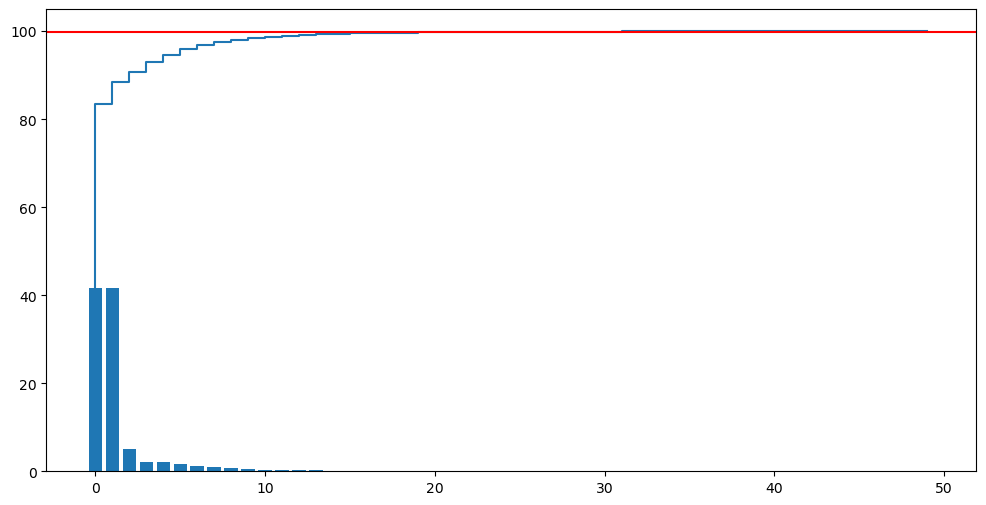

In [72]:
plt.figure(figsize=(12,6))
plt.bar(range(50) , var_exp)
plt.step(range(50), cum_exp_var)
plt.axhline(99.9, c='red')
plt.show()

In [74]:
from sklearn.decomposition import PCA 
mypca=PCA(n_components=0.9990) 
pca1=mypca.fit_transform(df2) 
pca1_df=pd.DataFrame(pca1) 
pca1_df.head()  

,0,1,2,3,4,5,6,7,8,9,...,19,20,21,22,23,24,25,26,27,28
0,-4.931946,17.883770,-8.634895,3.252735,4.200115,8.522233,-4.782120,1.916817,-2.413600,-2.710911,...,-0.002164,-0.735332,-0.995589,0.952380,-1.334801,0.283707,-0.616030,0.598927,-0.878618,-0.848894
1,6.120402,41.937421,5.643440,-7.092652,0.145232,-9.462572,-4.813690,-0.549823,3.537491,-2.171031,...,-0.553758,-0.366998,0.983896,-0.577954,0.591838,0.489433,0.603041,0.048138,-0.528220,0.532579
2,-23.809430,27.152523,-9.447309,-4.899381,-2.427197,-2.482822,1.108323,-5.305683,-2.547369,0.336495,...,-1.211212,-0.874648,0.532097,-0.186315,-0.098288,-0.275649,-1.224067,0.395688,0.405189,0.204462
3,14.389442,-57.515286,-8.609481,1.375229,1.542505,8.515201,-5.475933,0.603498,-4.345266,-3.087698,...,-0.416940,0.168069,-0.301529,-0.058543,-0.573540,-0.862541,-0.045351,0.497665,0.133304,-0.509447
4,-18.529973,28.789017,-1.341803,-10.313672,1.759233,-6.416993,-4.933750,-2.197239,0.403567,-1.925173,...,-0.438223,-1.219088,0.662818,-0.460129,-0.552709,-0.473492,0.836340,0.065209,-0.506287,0.349376


In [47]:
y = df1['Seizure_Type_Label']
x= df2

In [49]:
y.value_counts(normalize = True)*100

Seizure_Type_Label
0    59.871631
1    40.128369
Name: proportion, dtype: float64

In [114]:
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,random_state=10,test_size=0.2, stratify = y, shuffle = True)

In [116]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(xtrain, ytrain)

LogisticRegression()

In [118]:
ypred=lr.predict(xtest)

In [120]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.60      1.00      0.75     34607
           1       0.00      0.00      0.00     23195

    accuracy                           0.60     57802
   macro avg       0.30      0.50      0.37     57802
weighted avg       0.36      0.60      0.45     57802



In [59]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(xtrain,ytrain)

RandomForestClassifier()

In [87]:
ypred=rf.predict(xtest)

In [88]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.60      0.96      0.74     34607
           1       0.38      0.03      0.06     23195

    accuracy                           0.59     57802
   macro avg       0.49      0.50      0.40     57802
weighted avg       0.51      0.59      0.47     57802



In [65]:
from sklearn.tree import DecisionTreeClassifier  
dtc= DecisionTreeClassifier()
dtc.fit(xtrain,ytrain)

DecisionTreeClassifier()

In [83]:
ypred=dtc.predict(xtest)

In [85]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.60      0.60      0.60     34607
           1       0.41      0.41      0.41     23195

    accuracy                           0.52     57802
   macro avg       0.50      0.50      0.50     57802
weighted avg       0.52      0.52      0.52     57802



In [71]:
from sklearn.ensemble import AdaBoostClassifier
abc= AdaBoostClassifier()
abc.fit(xtrain,ytrain)

AdaBoostClassifier()

In [73]:
ypred=abc.predict(xtest)

In [75]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.60      1.00      0.75     34607
           1       0.00      0.00      0.00     23195

    accuracy                           0.60     57802
   macro avg       0.30      0.50      0.37     57802
weighted avg       0.36      0.60      0.45     57802



In [77]:
from sklearn.ensemble import BaggingClassifier
bc= BaggingClassifier()
bc.fit(xtrain,ytrain)

BaggingClassifier()

In [79]:
ypred=bc.predict(xtest)

In [81]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.60      0.81      0.69     34607
           1       0.40      0.19      0.25     23195

    accuracy                           0.56     57802
   macro avg       0.50      0.50      0.47     57802
weighted avg       0.52      0.56      0.51     57802



In [91]:
from xgboost import XGBClassifier 
xgb= XGBClassifier()
xgb.fit(xtrain,ytrain)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [93]:
ypred=xgb.predict(xtest)

In [95]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.60      0.92      0.73     34607
           1       0.40      0.07      0.13     23195

    accuracy                           0.58     57802
   macro avg       0.50      0.50      0.43     57802
weighted avg       0.52      0.58      0.49     57802



In [108]:
from sklearn.ensemble import GradientBoostingClassifier
gbc= GradientBoostingClassifier()
gbc.fit(xtrain,ytrain)

GradientBoostingClassifier()

In [110]:
ypred=gbc.predict(xtest)

In [112]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.60      1.00      0.75     51910
           1       0.37      0.00      0.00     34793

    accuracy                           0.60     86703
   macro avg       0.49      0.50      0.38     86703
weighted avg       0.51      0.60      0.45     86703

